In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


# pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [292]:
df = pd.read_csv('Downloads/train.csv')

In [293]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [294]:
len(df)

1460

# Cleaning Data

Since there are 80 Features, I am going to do clean data and do feature selection before any visuvalization

In [295]:
t = pd.DataFrame(df.columns,columns = ['Feature'])
t['Null Sum'] = pd.DataFrame(np.array(df.isnull().sum()))

In [296]:
t.sort_values(by = ['Null Sum'], ascending=False)[:10]

,Feature,Null Sum
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
59,GarageYrBlt,81
64,GarageCond,81
58,GarageType,81
60,GarageFinish,81


In [297]:
t.sort_values(by = ['Null Sum'], ascending=False)['Feature'][:10].values

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish'], dtype=object)

In [298]:
df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage'] , inplace = True)

In [299]:
len_bef = len(df)

In [300]:
len_bef

1460

In [301]:
df.dropna(inplace = True)
len(df)

1338

In [302]:
df.reset_index(inplace = True)

In [303]:
df.columns

Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

We need to do Pearson's test for Numerical Input and ANOVA for Categorical

# Lets Scale data and Convert Features into One Hot Eoncoding/Rank Order

Given that numbr of Features is high and most the features have some sort of ranking, we can convert all of them into rank

In [304]:
cat_features = list(df.select_dtypes(['object']).columns)

In [305]:
num_features =  list(df.select_dtypes(['float','int64']).columns)

In [306]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [307]:
from sklearn.preprocessing import OrdinalEncoder

In [308]:
enc = OrdinalEncoder()
enc.fit(df[list(df.select_dtypes(['object']).columns)])
df[list(df.select_dtypes(['object']).columns)] = enc.transform(df[list(df.select_dtypes(['object']).columns)])

In [309]:
df.head()

,index,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3.000,8450,1.000,3.000,3.000,0.000,4.000,...,0,0,0,0,0,2,2008,8.000,4.000,208500
1,1,2,20,3.000,9600,1.000,3.000,3.000,0.000,2.000,...,0,0,0,0,0,5,2007,8.000,4.000,181500
2,2,3,60,3.000,11250,1.000,0.000,3.000,0.000,4.000,...,0,0,0,0,0,9,2008,8.000,4.000,223500
3,3,4,70,3.000,9550,1.000,0.000,3.000,0.000,0.000,...,272,0,0,0,0,2,2006,8.000,0.000,140000
4,4,5,60,3.000,14260,1.000,0.000,3.000,0.000,2.000,...,0,0,0,0,0,12,2008,8.000,4.000,250000


In [310]:
X = df[cat_features].copy()
y = df['SalePrice']

In [311]:
from scipy.stats import f
# define probability
p = 0.80
dfn =len(cat_features ) -1
dfd = len(df)-1
# retrieve value <= probability
value = f.ppf(p, dfn,dfd)
print("Critical F Value is",value)

Critical F Value is 1.1925782217687453


In [312]:
fs = SelectKBest(score_func=f_classif, k=38)
# apply feature selection
X_selected = fs.fit_transform(X, y)
#print(X_selected.shape)
fit = fs.fit(X, y.values.ravel())
#print(fit.scores_)
#print(fit.pvalues_)
drop = []
for n,s,p in zip(X.columns,fit.scores_,fit.pvalues_):
    if(s < 1.19):
        print("F-score and P-values respectively : ", "{:.2f}".format(s),"and", "{:.3f}".format(p), " for feature ", n)
        drop.append(n)

F-score and P-values respectively :  1.02 and 0.376  for feature  LandContour
F-score and P-values respectively :  0.23 and 1.000  for feature  Utilities
F-score and P-values respectively :  0.97 and 0.672  for feature  LotConfig
F-score and P-values respectively :  1.07 and 0.196  for feature  LandSlope
F-score and P-values respectively :  0.80 and 0.998  for feature  Condition1
F-score and P-values respectively :  1.04 and 0.295  for feature  BldgType
F-score and P-values respectively :  1.03 and 0.346  for feature  HouseStyle
F-score and P-values respectively :  1.15 and 0.037  for feature  RoofStyle
F-score and P-values respectively :  1.09 and 0.125  for feature  RoofMatl
F-score and P-values respectively :  0.99 and 0.560  for feature  Exterior1st
F-score and P-values respectively :  1.05 and 0.282  for feature  Exterior2nd
F-score and P-values respectively :  0.90 and 0.917  for feature  ExterCond
F-score and P-values respectively :  1.06 and 0.226  for feature  BsmtCond
F-score

In [313]:
df_clean = df.drop(columns = drop)

In [314]:
from sklearn.feature_selection import f_regression

In [315]:
X = df[num_features].copy()
X.drop(columns = ['SalePrice'],inplace = True)
y = df['SalePrice']

In [316]:
from scipy.stats import f
# define probability
p = 0.95
dfn =len(num_features) -1 -1
dfd = len(df)-1
# retrieve value <= probability
value = f.ppf(p, dfn,dfd)
print("Critical F Value is",value)

Critical F Value is 1.4256150496160964


In [317]:
fs = SelectKBest(score_func=f_regression, k=37)
# apply feature selection
X_selected = fs.fit_transform(X, y)
#print(X_selected.shape)
fit = fs.fit(X, y.values.ravel())
#print(fit.scores_)
#print(fit.pvalues_)
drop = []
for n,s,p in zip(X.columns,fit.scores_,fit.pvalues_):
    if(s < 1.4256):
        print("F-score and P-values respectively : ", "{:.2f}".format(s),"and", "{:.3f}".format(p), " for feature ", n)
        drop.append(n)

F-score and P-values respectively :  1.24 and 0.265  for feature  index
F-score and P-values respectively :  1.24 and 0.265  for feature  Id
F-score and P-values respectively :  1.30 and 0.254  for feature  BsmtFinSF2
F-score and P-values respectively :  0.13 and 0.715  for feature  LowQualFinSF
F-score and P-values respectively :  1.22 and 0.270  for feature  BsmtHalfBath
F-score and P-values respectively :  0.39 and 0.535  for feature  MiscVal
F-score and P-values respectively :  0.56 and 0.455  for feature  YrSold


In [318]:
df_clean = df_clean.drop(columns = drop)

In [319]:
df_clean.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'Neighborhood', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'SalePrice'],
      dtype='object')

# Applying PCA to reduce features

In [320]:

from sklearn.decomposition import PCA


1. Principal Components Analysis (PCA) is a well-known unsupervised dimensionality reduction technique that constructs relevant features/variables through linear (linear PCA) or non-linear (kernel PCA) combinations of the original variables (features). 
2. The construction of relevant features is achieved by linearly transforming correlated variables into a smaller number of uncorrelated variables.
3. PCA can be used when the dimensions of the input features are high (e.g. a lot of variables).
4. PCA can be also used for denoising and data compression.
5. Drawbacks of PCA -Removes features well when multi-colinearity (linear relationship) exists between the features/variables.

In [321]:
len(df_clean.columns)

46

In [322]:
X=df_clean.drop(columns = ['SalePrice'])

In [323]:

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components= 15)
pca.fit(X)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X)

In [324]:
X_reduced= pd.DataFrame(X_reduced)

In [325]:
X_reduced['SalePrice']  = df_clean['SalePrice'].copy()

In [326]:
X_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,SalePrice
0,-2255.860,-13.949,-252.158,-776.152,-159.190,27.286,12.382,-103.521,9.910,-13.533,2.802,-37.806,-4.381,-14.148,0.032,208500
1,-1102.552,-72.435,745.532,-191.584,31.715,109.905,35.033,203.060,-43.072,21.930,-27.931,-2.448,-13.868,-28.137,-5.214,181500
2,543.686,51.181,-457.630,-459.141,-150.714,35.352,66.504,-108.421,9.710,2.139,-18.361,-41.572,-2.435,-10.704,-1.651,223500
3,-1161.092,-93.455,-579.961,-231.852,54.804,-20.960,180.648,-137.155,-32.911,190.377,89.437,113.627,-18.375,23.824,5.972,140000
4,3566.434,612.264,-506.790,-568.981,-267.314,-95.780,148.702,24.012,9.941,6.669,4.337,-12.262,-9.218,-16.283,-4.708,250000


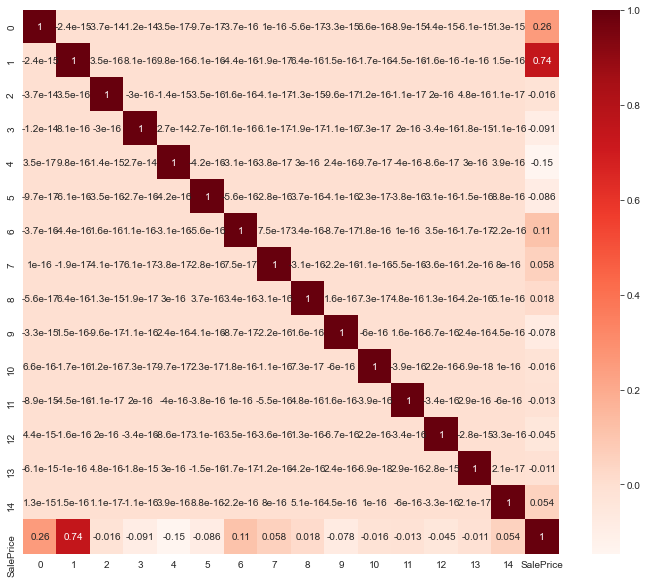

In [270]:
plt.figure(figsize=(12,10))
cor = X_reduced.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Model

In [327]:
X = X_reduced.copy()
X.drop(columns = ['SalePrice'],inplace = True)
y = X_reduced['SalePrice']

In [328]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [330]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [333]:
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [334]:
from sklearn import metrics

In [336]:
metrics.r2_score(y_test,y_pred)

0.99998948516713

In [339]:

Rsq = pol_reg.score(poly_reg.fit_transform(X_train),y_train)

N = len(X_reduced.columns) -1

K =1

fstat = (Rsq/(1-Rsq))*((N-K-1)/K) 
# fstat = scipy.stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

print(fstat)

866981.208915916


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

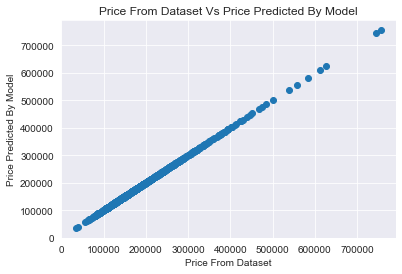

In [340]:
plt.scatter(y_train,pol_reg.predict(poly_reg.fit_transform(X_train)))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)